In [2]:
# Download the dataset from Kaggle
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("aliiihussain/amazon-sales-dataset")

print(path)

Using Colab cache for faster access to the 'amazon-sales-dataset' dataset.
/kaggle/input/amazon-sales-dataset


In [4]:
csv_path = os.path.join(path, "amazon_sales_dataset.csv")
df = pd.read_csv(csv_path, encoding="latin-1")

# Import Libraries

In [5]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

# Exploratory Data Analysis (EDA)

In [6]:
# Display first 5 rows
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [7]:
# Display last 5 rows
df.tail()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
49995,49996,2022-09-03,1433,Beauty,26.99,0,5,Middle East,Credit Card,2.4,386,26.99,134.95
49996,49997,2022-07-03,1428,Beauty,294.23,10,5,Asia,Credit Card,3.1,8,264.81,1324.05
49997,49998,2023-02-17,4651,Electronics,352.11,30,4,Asia,Debit Card,3.1,104,246.48,985.92
49998,49999,2022-09-30,4371,Beauty,307.54,5,1,Middle East,UPI,1.8,316,292.16,292.16
49999,50000,2023-06-29,2944,Home & Kitchen,253.44,30,1,Europe,Debit Card,2.1,464,177.41,177.41


The dataset contains Amazon e-commerce sales records, where each row represents a single customer order. The columns include order details such as product category, price, discount percentage, quantity sold, customer region, payment method, ratings, and total revenue. The data contains both numerical and categorical features, making it suitable for sales analysis and machine learning tasks after basic data preprocessing.

In [9]:
# Check missing values
print(df.isna().sum())

order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64


There is no missing values

In [10]:
# Check for duplicate samples
def check_duplicates(df):
  duplicates = df.duplicated().sum()
  print(f"Number of Duplicate Samples: {duplicates}")
  if duplicates > 0:
    print("Dropping Duplicates...")
    df.drop_duplicates(inplace=True)
    print("Duplicates Dropped.")
  else:
    print("No Duplicate Samples Found.")

check_duplicates(df)

Number of Duplicate Samples: 0
No Duplicate Samples Found.


In [12]:
# finding number of rows and columns
print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (50000, 13) 

number of rows:  50000
number of columns:  13


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


In [14]:
df.describe()

,order_id,product_id,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,2986.848740,252.507260,13.340700,2.999400,2.996316,249.329280,218.886566,657.331475
std,14433.901067,1156.374535,143.025544,9.850694,1.415401,1.154295,144.251981,127.317681,526.223968
min,1.000000,1000.000000,5.010000,0.000000,1.000000,1.000000,0.000000,3.530000,3.840000
25%,12500.750000,1983.000000,127.840000,5.000000,2.000000,2.000000,125.000000,109.680000,240.320000
50%,25000.500000,2983.000000,252.970000,10.000000,3.000000,3.000000,250.000000,215.805000,505.410000
75%,37500.250000,3989.000000,376.335000,20.000000,4.000000,4.000000,374.000000,322.702500,968.970000
max,50000.000000,4999.000000,499.990000,30.000000,5.000000,5.000000,499.000000,499.910000,2499.550000


In [15]:
# We will delete order_id and product_id because we don't need them
df = df.drop(columns=['order_id', 'product_id'])
df

,order_date,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,2022-04-13,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2023-03-12,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,2022-09-28,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,2022-04-17,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,2022-03-13,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72
...,...,...,...,...,...,...,...,...,...,...,...
49995,2022-09-03,Beauty,26.99,0,5,Middle East,Credit Card,2.4,386,26.99,134.95
49996,2022-07-03,Beauty,294.23,10,5,Asia,Credit Card,3.1,8,264.81,1324.05
49997,2023-02-17,Electronics,352.11,30,4,Asia,Debit Card,3.1,104,246.48,985.92
49998,2022-09-30,Beauty,307.54,5,1,Middle East,UPI,1.8,316,292.16,292.16


In [43]:
df['order_date'] = pd.to_datetime(df['order_date'])
df.dtypes

,0
order_date,datetime64[ns]
product_category,object
price,float64
discount_percent,int64
quantity_sold,int64
customer_region,object
payment_method,object
rating,float64
review_count,int64
discounted_price,float64


## Sales by Product Category

<Axes: xlabel='product_category'>

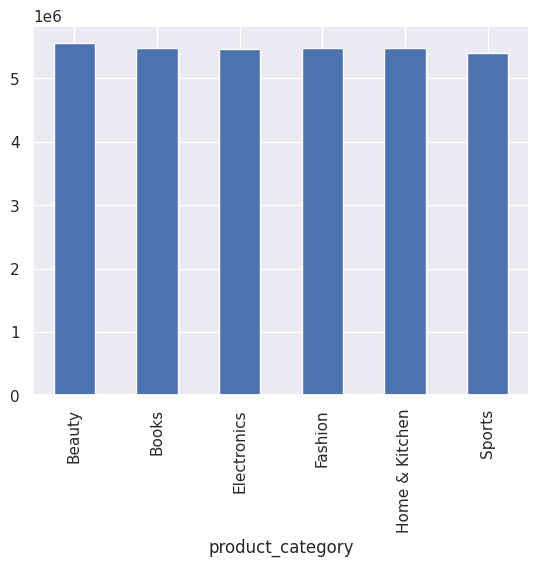

In [44]:
df.groupby("product_category")["total_revenue"].sum().plot(kind="bar")

In [45]:
df.groupby("product_category")["total_revenue"].sum().sort_values(ascending=False)

,total_revenue
product_category,
Beauty,5550624.97
Books,5484863.03
Fashion,5480123.34
Home & Kitchen,5473132.55
Electronics,5470594.03
Sports,5407235.82


The graph shows that total revenue is relatively balanced across all product categories, with Beauty generating slightly higher sales compared to the other categories. This indicates consistent customer demand across different product types.

## Total Revenue Distribution

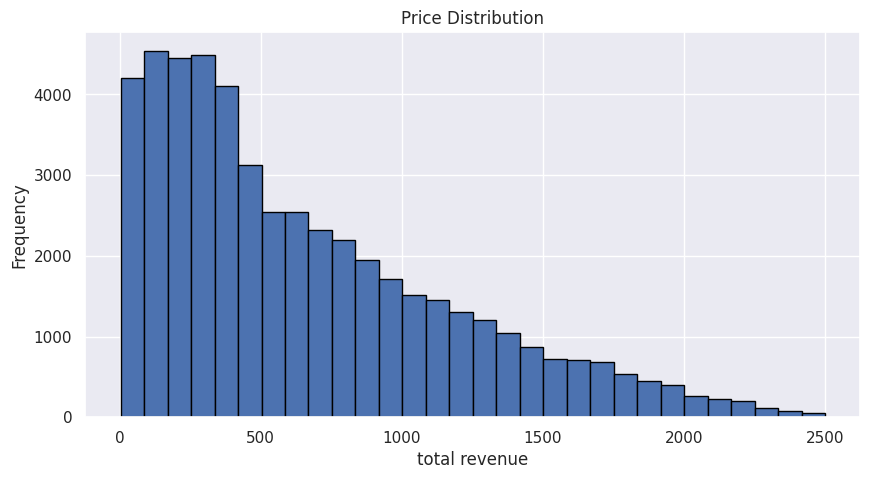

In [46]:
plt.figure(figsize=(10, 5))
plt.hist(df['total_revenue'].dropna(), bins=30, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('total revenue')
plt.ylabel('Frequency')
plt.show()

The histogram shows that most orders generate low to moderate total revenue, while high-revenue orders occur less frequently, indicating a right-skewed revenue distribution.

## Price Distribution

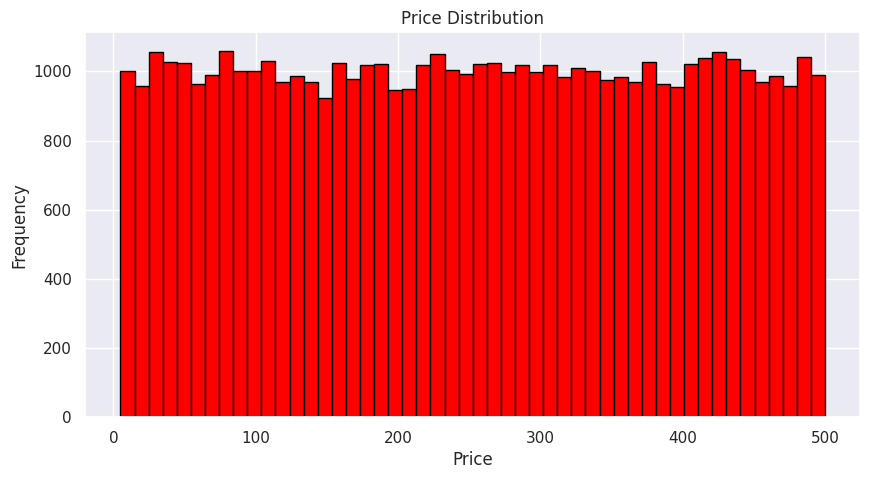

In [47]:
# Price distribution (target variable)
plt.figure(figsize=(10, 5))
plt.hist(df['price'].dropna(), bins=50, edgecolor='black', color= 'red')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The price distribution appears relatively uniform across the dataset, indicating that products are evenly distributed over different price ranges without significant concentration in a specific price level.

## Payment Method Usage

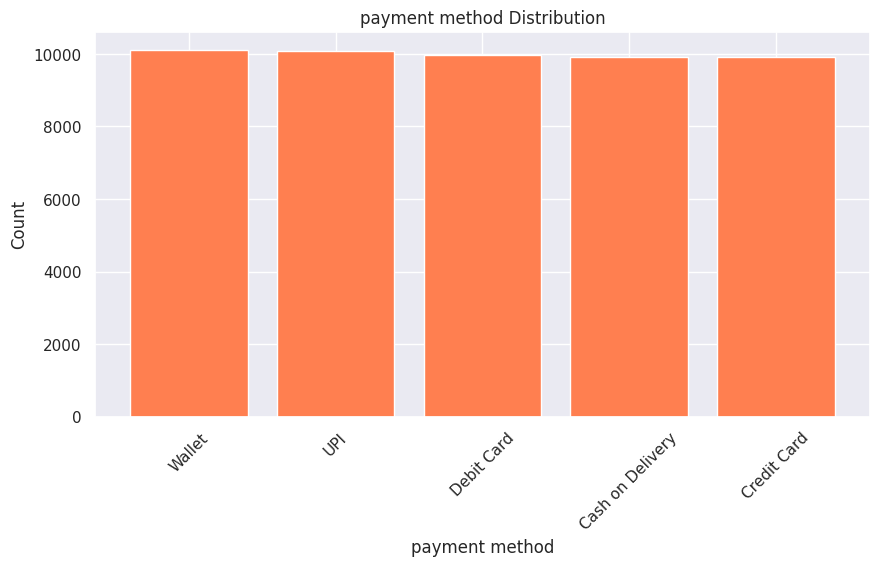

In [48]:
condition_counts = df['payment_method'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(condition_counts.index, condition_counts.values, color='coral')
plt.title('payment method Distribution')
plt.xlabel('payment method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The distribution of payment methods is nearly uniform, indicating that customers use different payment options at similar rates without a clear preference for a specific method.

## Rating Distribution

<Axes: >

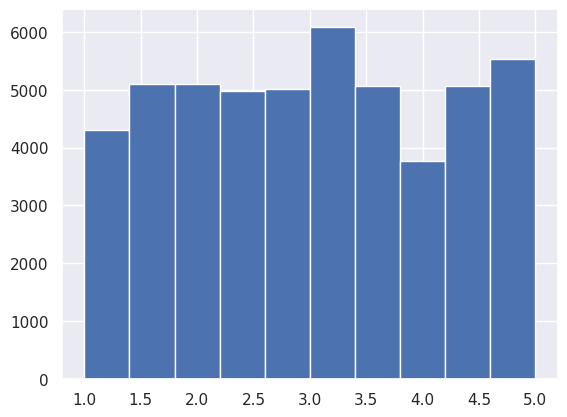

In [49]:
df["rating"].hist(bins=10)

The rating distribution appears relatively balanced, with a slight concentration in the mid-to-high rating range, suggesting generally moderate to positive customer feedback